In [1]:
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_fwf('Station_Locations.txt')

In [3]:
df.head()

,CD,STATION,ICAO,IATA,SYNOP,LAT,LON,ELEV(m)S,T,U,F,H
0,AE,ABU DHABI BATEEN,OMAD,AZI,41216.0,24 26N,054 28E,3 X,NaN,NaN,X,X
1,AE,ABU DHABI INTL,OMAA,AUH,41217.0,24 26N,054 39E,27 X,X,X,X,X
2,AE,ABU DHBAI/AL DHA,KQGX,NaN,NaN,24 15N,054 33E,23,NaN,NaN,X,X
3,AE,AL AIN INTL,OMAL,AAN,41218.0,24 16N,055 36E,262 X,NaN,NaN,X,X
4,AE,AL FUJAIRAH,OMFJ,FJR,41198.0,25 06N,056 20E,28 X,NaN,NaN,X,X


In [4]:
def parse_lat_lon_string(text):
    text = text.split(' ')
    degrees = int(text[0]) + float(text[1][0:2])/100
    if (text[1][-1] == 'S') or (text[1][-1] =='W'):
        degrees *= -1
    return degrees

In [5]:
df['LAT'] = df['LAT'].map(parse_lat_lon_string, na_action='ignore')
df['LON'] = df['LON'].map(parse_lat_lon_string, na_action='ignore')

In [6]:
# Stations to get data from
all_stations = ['UIL', 'YLW', 'OTX', 'MFR', 'BOI', 'REV', 'OAK',
            'LKN', 'VEF', 'NKX', 'TFX', 'GGW', 'RIW', 'RAP',
            'SLC', 'GJT', 'DNR', 'ABQ', 'FGZ', 'TUS', 'EPZ',
            'BIS', 'ABR', 'MPX', 'WPL', 'INL', 'YMO', 'GRB',
            'LBF', 'OAX', 'DDC', 'TOP', 'AMA', 'OUN', 'MAF',
            'FWD', 'DRT', 'CRP', 'ADN', 'BRO', 'DVN', 'ILX',
            'SGF', 'LZK', 'SHV', 'LCH', 'JAN', 'LIX', 'BMX',
            'BNA', 'FFC', 'TLH', 'APX', 'DTX', 'ILN', 'WMW',
            'GYX', 'BUF', 'ALB', 'CAR', 'YQI', 'CHH', 'OKX',
            'PIT', 'IAD', 'WAL', 'MHX', 'RNK', 'GSO', 'CHS',
            'JAX', 'TBW', 'MFL', 'KEY']

lats_all = []
longs_all = []
for station in all_stations:
    try:
        stn = df[df['ICAO'] == 'K'+station]
        lats_all.append(float(stn['LAT']))
        longs_all.append(float(stn['LON']))
    except:
        print("No record ", station)

No record  YLW
No record  WPL
No record  YMO
No record  ADN
No record  WMW
No record  YQI


In [7]:
df_soundings = pd.read_csv('Soundings_1992.txt')
lats_1992 = []
longs_1992 = []
stations = df_soundings['Station'].unique()
for station in stations:
    try:
        stn = df[df['ICAO'] == 'K'+station]
        lats_1992.append(float(stn['LAT']))
        longs_1992.append(float(stn['LON']))
    except:
        print("No record ", station)

No record  WPL
No record  YMO
No record  ADN
No record  WMW
No record  YQI


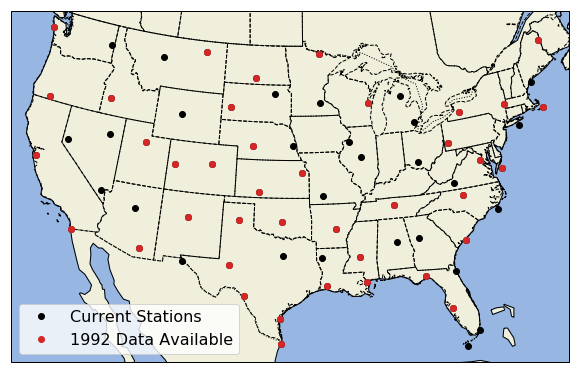

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal())

ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS, linestyle=':')

# Grab state borders
state_borders = cfeat.NaturalEarthFeature(category='cultural',
    name='admin_1_states_provinces_lakes', scale='50m', facecolor='none') 
ax.add_feature(state_borders, linestyle="--", edgecolor='k')

ax.plot(longs_all, lats_all, transform=ccrs.PlateCarree(), marker='o', linestyle='None', color='k', label='Current Stations')
ax.plot(longs_1992, lats_1992, transform=ccrs.PlateCarree(), marker='o', linestyle='None', color='tab:red', label='1992 Data Available')

plt.legend(fontsize=16)

plt.savefig('../Plots/Station_Map.png', bbox_inches='tight', dpi=300); 